#### Configure Nvidia GPU computing as default

In [1]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)} is available.")
else:
    print("No GPU available. Training will run on CPU.")

Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650
GPU: NVIDIA GeForce GTX 1650 is available.


In [2]:
#Configure device: Set the device configuration to GPU using the torch.device class in PyTorch:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Selected Device:", device)

Selected Device: cuda


#### Import Library 📚

In [3]:
import pandas as pd
import numpy as np

#### Load data

In [4]:
df = pd.read_csv("./data/cassie_comments_cleaned.csv")
df.head(10)

,comment
0,they clearly felt the cold water during beta a...
1,after playing the story i still think the glob...
2,it is broken as the reason most showcases achi...
3,being selfaware that you sound like a hoyo shi...
4,i dont really mind the passives even if they a...
5,im not having castorice and paying more attent...
6,hoyocuck cc
7,the furthest it should go is affecting the opp...
8,i dont think they will do it again most than a...
9,hoyo is a business and the game is easy enough...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7963 entries, 0 to 7962
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  7858 non-null   object
dtypes: object(1)
memory usage: 62.3+ KB


#### Distilbert fine tune pretrained

In [6]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, pipeline

tokenizer = DistilBertTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")


#### load inference pipeline

In [7]:
sentiment = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

Device set to use cuda:0


#### Labeling using Pseudo techniques

In [8]:
from tqdm import tqdm

tqdm.pandas()

results = []
batch_size = 256

# Check the columns in the dataframe
print("DataFrame columns:", df.columns)

# Ensure 'comment' column exists
if 'comment' in df.columns:
    for i in range(0, len(df), batch_size):
        batch = df['comment'].iloc[i:i+batch_size].astype(str).tolist()
        predictions = sentiment(batch, truncation=True)
        results.extend(predictions)

    # Add to dataframe
    df['sentiment_label'] = [r['label'] for r in results]
    df['sentiment_score'] = [r['score'] for r in results]
    df['label'] = df['sentiment_label'].map({'NEGATIVE': 0, 'POSITIVE': 1})
else:
    print("Error: 'comment' column not found in the dataframe.")

df.head(20)

DataFrame columns: Index(['comment'], dtype='object')


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,comment,sentiment_label,sentiment_score,label
0,they clearly felt the cold water during beta a...,NEGATIVE,0.999122,0
1,after playing the story i still think the glob...,NEGATIVE,0.991565,0
2,it is broken as the reason most showcases achi...,NEGATIVE,0.999086,0
3,being selfaware that you sound like a hoyo shi...,NEGATIVE,0.989961,0
4,i dont really mind the passives even if they a...,NEGATIVE,0.986159,0
5,im not having castorice and paying more attent...,NEGATIVE,0.997392,0
6,hoyocuck cc,NEGATIVE,0.983056,0
7,the furthest it should go is affecting the opp...,NEGATIVE,0.995662,0
8,i dont think they will do it again most than a...,NEGATIVE,0.996770,0
9,hoyo is a business and the game is easy enough...,POSITIVE,0.999394,1


In [9]:
#save to CSV

df = pd.DataFrame(df)
df.to_csv("cassie_comments_labeled.csv", index=False)
print("Saved to CSV✅, check your folder")

Saved to CSV✅, check your folder


#### Load labeled data

In [10]:
cassi = pd.read_csv("./cassie_comments_labeled.csv")
cassi.head(5)

,comment,sentiment_label,sentiment_score,label
0,they clearly felt the cold water during beta a...,NEGATIVE,0.999122,0
1,after playing the story i still think the glob...,NEGATIVE,0.991565,0
2,it is broken as the reason most showcases achi...,NEGATIVE,0.999086,0
3,being selfaware that you sound like a hoyo shi...,NEGATIVE,0.989961,0
4,i dont really mind the passives even if they a...,NEGATIVE,0.986159,0


In [11]:
cassi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7963 entries, 0 to 7962
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   comment          7858 non-null   object 
 1   sentiment_label  7963 non-null   object 
 2   sentiment_score  7963 non-null   float64
 3   label            7963 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 249.0+ KB


In [12]:
cassi.isnull().sum()

comment            105
sentiment_label      0
sentiment_score      0
label                0
dtype: int64

#### Cleaning missing value

In [13]:
cassi_clean = cassi.dropna()
print(cassi_clean)

                                                comment sentiment_label  \
0     they clearly felt the cold water during beta a...        NEGATIVE   
1     after playing the story i still think the glob...        NEGATIVE   
2     it is broken as the reason most showcases achi...        NEGATIVE   
3     being selfaware that you sound like a hoyo shi...        NEGATIVE   
4     i dont really mind the passives even if they a...        NEGATIVE   
...                                                 ...             ...   
7958     i really feel her sadness e s castorice please        POSITIVE   
7959  this felt more than seven minutes these animat...        NEGATIVE   
7960                                               casy        POSITIVE   
7961                          this is certainly english        POSITIVE   
7962    depression is our friend thats quite depressing        NEGATIVE   

      sentiment_score  label  
0            0.999122      0  
1            0.991565      0  
2     

In [14]:
cassi_clean.isnull().sum()

comment            0
sentiment_label    0
sentiment_score    0
label              0
dtype: int64

In [15]:
# select column for splitting process
cassi_clean = cassi_clean[['comment','label']]
cassi_clean.head(10)

,comment,label
0,they clearly felt the cold water during beta a...,0
1,after playing the story i still think the glob...,0
2,it is broken as the reason most showcases achi...,0
3,being selfaware that you sound like a hoyo shi...,0
4,i dont really mind the passives even if they a...,0
5,im not having castorice and paying more attent...,0
6,hoyocuck cc,0
7,the furthest it should go is affecting the opp...,0
8,i dont think they will do it again most than a...,0
9,hoyo is a business and the game is easy enough...,1


#### Splitting Data 📏

In [16]:
X = cassi_clean['comment']
y = cassi_clean['label']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
# print("Training data shape:", len(X_train))
# print("Testing data shape:", len(y_test))

train_df = pd.DataFrame({'text': X_train,'label': y_train})
test_df = pd.DataFrame({'text': X_test,'label': y_test})

# Print the shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", y_test.shape)

Training data shape: (6286,)
Testing data shape: (1572,)


#### Check Data Balance 👻

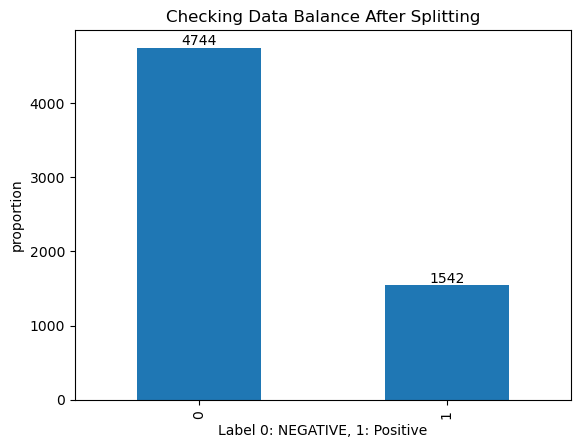

In [18]:
import matplotlib.pyplot as plt

val_counts = y_train.value_counts() 
ax = val_counts.plot(kind='bar', title="Checking Data Balance After Splitting", ylabel="proportion", xlabel="Label 0: NEGATIVE, 1: Positive")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+ p.get_width()/ 2, p.get_height()),
                ha='center', va='bottom')
    
plt.show()

In [ ]:
# As you can see the data is inbalance which was a bad thing if want to train the model. an Imbalanced can be biased due
# to risk of instability and can effect the accuracy of the model. To make the data balance lets try one of the most used
# balancing technique

#### Load Tokenizer and Tokenize text

In [19]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
test_dataset= Dataset.from_pandas(test_df)

#apply tokenizer to datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset= test_dataset.map(tokenize_function, batched=True)

# Remove text column as it's no longer needed
train_dataset = train_dataset.remove_columns(["text"])
test_dataset= test_dataset.remove_columns(["text"])

# Convert labels to int format
train_dataset.with_format("torch")
test_dataset.with_format("torch")

Map:   0%|          | 0/6286 [00:00<?, ? examples/s]

Map:   0%|          | 0/1572 [00:00<?, ? examples/s]

Dataset({
    features: ['label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 1572
})

#### ⚖️ Compute Class Weights

In [20]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)

class_weight = torch.tensor(class_weight, dtype=torch.float)
print("Class Weight:", class_weight)

Class Weight: tensor([0.6625, 2.0383])


#### Define Trainer and metrics

In [21]:
import evaluate

metric = evaluate.load("accuracy")
metric2 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return {"accuracy": metric.compute(predictions=predictions, references=labels)["accuracy"],
            "f1": metric2.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    }

In [22]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch.nn as nn
#load model
model = DistilBertForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english", 
                                                            num_labels=2).to(device)

# enable gpu optimizations
torch.backends.cudnn.benchmark = True

class weightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fc= nn.CrossEntropyLoss(weight=class_weight.to(model.device))
        loss = loss_fc(logits, labels)
        return (loss, outputs) if return_outputs else loss
    
model.gradient_checkpointing_enable()  # Reduces memory usage during training

training_args = TrainingArguments(
    output_dir='./distilbert_castorice_result',
    learning_rate=1e-5,
    num_train_epochs=3, #increase epochs
    per_device_train_batch_size=8, #train batch size
    per_device_eval_batch_size=8,  #eval batch size
    eval_strategy="epoch", # Evaluate model at the end of each epoch
    save_strategy="epoch",  # Set save_strategy to "epoch"
    eval_steps=500,
    warmup_steps=100,# increase learning rate every 100 steps
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    fp16=False, #Gpu Optimization if capable yes, if not FALSE
    push_to_hub=False,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none", 
)

trainer = weightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,

)
trainer.train()

C:\Users\Darren\AppData\Local\Temp\ipykernel_15244\126106320.py:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `weightedTrainer.__init__`. Use `processing_class` instead.
  trainer = weightedTrainer(


  0%|          | 0/2358 [00:00<?, ?it/s]

{'loss': 0.2046, 'grad_norm': 18.68613052368164, 'learning_rate': 1e-05, 'epoch': 0.13}
{'loss': 0.3146, 'grad_norm': 1.1580209732055664, 'learning_rate': 9.557130203720107e-06, 'epoch': 0.25}
{'loss': 0.291, 'grad_norm': 54.966941833496094, 'learning_rate': 9.114260407440213e-06, 'epoch': 0.38}
{'loss': 0.2676, 'grad_norm': 82.16973114013672, 'learning_rate': 8.67139061116032e-06, 'epoch': 0.51}
{'loss': 0.3258, 'grad_norm': 78.6208267211914, 'learning_rate': 8.228520814880426e-06, 'epoch': 0.64}
{'loss': 0.3018, 'grad_norm': 0.27692025899887085, 'learning_rate': 7.785651018600532e-06, 'epoch': 0.76}
{'loss': 0.3779, 'grad_norm': 80.85787200927734, 'learning_rate': 7.3427812223206385e-06, 'epoch': 0.89}


  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.15615442395210266, 'eval_accuracy': 0.955470737913486, 'eval_f1': 0.9552292136395862, 'eval_runtime': 14.2476, 'eval_samples_per_second': 110.335, 'eval_steps_per_second': 13.827, 'epoch': 1.0}
{'loss': 0.1913, 'grad_norm': 38.042327880859375, 'learning_rate': 6.899911426040744e-06, 'epoch': 1.02}
{'loss': 0.1408, 'grad_norm': 0.02006143145263195, 'learning_rate': 6.457041629760851e-06, 'epoch': 1.15}
{'loss': 0.2093, 'grad_norm': 0.013259734958410263, 'learning_rate': 6.014171833480958e-06, 'epoch': 1.27}
{'loss': 0.1352, 'grad_norm': 0.11821883171796799, 'learning_rate': 5.571302037201063e-06, 'epoch': 1.4}
{'loss': 0.0949, 'grad_norm': 0.5433295369148254, 'learning_rate': 5.1284322409211695e-06, 'epoch': 1.53}
{'loss': 0.1719, 'grad_norm': 0.01774401217699051, 'learning_rate': 4.685562444641275e-06, 'epoch': 1.65}
{'loss': 0.2371, 'grad_norm': 122.53411102294922, 'learning_rate': 4.242692648361382e-06, 'epoch': 1.78}
{'loss': 0.1778, 'grad_norm': 0.07445081323385239,

  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.15971782803535461, 'eval_accuracy': 0.9586513994910941, 'eval_f1': 0.9588471748751796, 'eval_runtime': 14.6713, 'eval_samples_per_second': 107.148, 'eval_steps_per_second': 13.428, 'epoch': 2.0}
{'loss': 0.1611, 'grad_norm': 13.538610458374023, 'learning_rate': 3.3569530558015946e-06, 'epoch': 2.04}
{'loss': 0.0942, 'grad_norm': 0.04701433330774307, 'learning_rate': 2.9140832595217013e-06, 'epoch': 2.16}
{'loss': 0.0628, 'grad_norm': 0.03193189576268196, 'learning_rate': 2.471213463241807e-06, 'epoch': 2.29}
{'loss': 0.0608, 'grad_norm': 0.7664394974708557, 'learning_rate': 2.0283436669619134e-06, 'epoch': 2.42}
{'loss': 0.0403, 'grad_norm': 0.7764725685119629, 'learning_rate': 1.5854738706820197e-06, 'epoch': 2.54}
{'loss': 0.0912, 'grad_norm': 0.010770567692816257, 'learning_rate': 1.142604074402126e-06, 'epoch': 2.67}
{'loss': 0.1038, 'grad_norm': 0.5124223232269287, 'learning_rate': 6.997342781222321e-07, 'epoch': 2.8}
{'loss': 0.0821, 'grad_norm': 1.028273463249206

  0%|          | 0/197 [00:00<?, ?it/s]

{'eval_loss': 0.1740725338459015, 'eval_accuracy': 0.9592875318066157, 'eval_f1': 0.9594631435674084, 'eval_runtime': 14.6603, 'eval_samples_per_second': 107.228, 'eval_steps_per_second': 13.438, 'epoch': 3.0}
{'train_runtime': 709.6069, 'train_samples_per_second': 26.575, 'train_steps_per_second': 3.323, 'train_loss': 0.17715542846255833, 'epoch': 3.0}


TrainOutput(global_step=2358, training_loss=0.17715542846255833, metrics={'train_runtime': 709.6069, 'train_samples_per_second': 26.575, 'train_steps_per_second': 3.323, 'total_flos': 624517550963712.0, 'train_loss': 0.17715542846255833, 'epoch': 3.0})

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Define label_map
label_map = {0: 'NEGATIVE', 1: 'POSITIVE'}  # Adjust according to your labels

predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

accuracy = accuracy_score(y_test, preds) * 100

#print classification report
print("DistilBERT Result")
print(f"Test Accuracy: {accuracy:.2f}%\n")
print(classification_report(y_test, preds, target_names=list(label_map.values())))

  0%|          | 0/197 [00:00<?, ?it/s]

DistilBERT Result
Test Accuracy: 95.93%

              precision    recall  f1-score   support

    NEGATIVE       0.98      0.97      0.97      1188
    POSITIVE       0.91      0.93      0.92       384

    accuracy                           0.96      1572
   macro avg       0.94      0.95      0.95      1572
weighted avg       0.96      0.96      0.96      1572



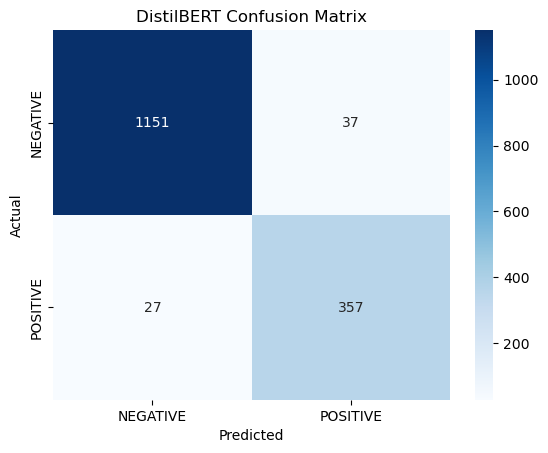

In [25]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=list(label_map.values()), yticklabels=list(label_map.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DistilBERT Confusion Matrix")
plt.show()

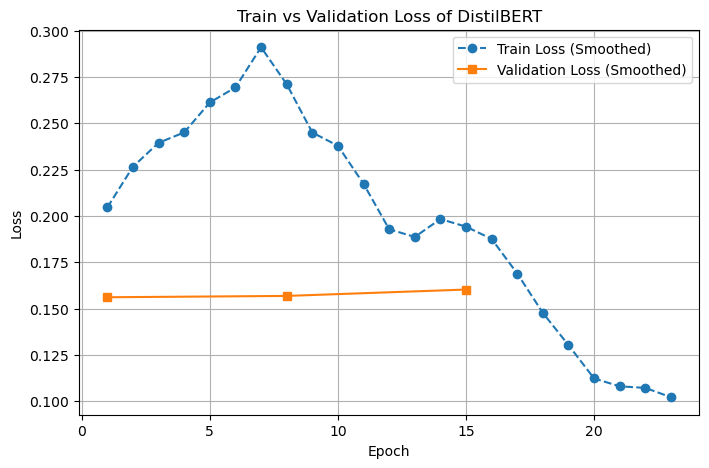

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the loss curves using a moving average
def smooth_curve(values, weight=0.8):
    smoothed = []
    last = values[0]
    for value in values:
        smoothed_value = last * weight + (1 - weight) * value
        smoothed.append(smoothed_value)
        last = smoothed_value
    return smoothed

# Extract and smooth losses
train_loss = [log["loss"] for log in trainer.state.log_history if "loss" in log]
eval_loss = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]

train_loss_smoothed = smooth_curve(train_loss)
eval_loss_smoothed = smooth_curve(eval_loss)

# Generate epochs in range
train_steps = list(range(1, len(train_loss_smoothed) + 1))
eval_epochs = list(range(1, len(eval_loss_smoothed) * (len(train_loss_smoothed) // len(eval_loss_smoothed)) + 1, len(train_loss_smoothed) // len(eval_loss_smoothed)))

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(train_steps, train_loss_smoothed, label="Train Loss (Smoothed)", marker="o", linestyle="dashed")
plt.plot(eval_epochs, eval_loss_smoothed, label="Validation Loss (Smoothed)", marker="s")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss of DistilBERT")
plt.legend()
plt.grid()
plt.show()

In [ ]:
trainer.save_model("distilbert_castorice_result")
tokenizer.save_pretrained("distilbert_castorice_result")